In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pypesto import store

from inference.helper_functions import compute_error_estimate
from inference.nlme_objective import ObjectiveFunctionNLME

/Users/jonas.arruda/miniconda/envs/Amortized-NLME/lib/python3.10/site-packages/bayesflow/trainers.py:27: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
import matplotlib

matplotlib.rcdefaults()  # for resetting to defaults
plt.rcParams.update({'font.size': 25,
                     'text.usetex': True,
                     "font.family": "serif",
                     "font.serif": ["Computer Modern Roman"],
                     'axes.titlesize': 'small',
                     'axes.labelsize': 'small',
                     'xtick.labelsize': 'small',
                     'ytick.labelsize': 'small',
                     'legend.fontsize': 'small',
                     #'figure.dpi': 600,
                     'figure.figsize': (16, 9)})  #
colors = ['#1f78b4', '#a6cee3', '#b2df8a', '#33a02c', '#fb9a99']

In [3]:
model_names = ['fröhlich-simple', 'fröhlich-detailed', 'fröhlich-sde']

In [4]:
prior_type = ['normal', 'uniform', 'normal_2'][2]

using 2 layers of MultiConv1D, a bidirectional LSTM with 256 units and a dense layer with output dimension 12 as summary network
using a 6-layer cINN as inference network with 2 layers of design spline
Using normal prior
prior mean: [-3. -3.  5.  0.  0. -1.]
prior covariance diagonal: [ 25.  25. 121.   4.  36.   4.]
Using the model SimpleFroehlichModel


  Activating project at `~/PyCharm Projects/Amortized-NLME/models/SimulatorFroehlich`


using 2 layers of MultiConv1D, a bidirectional LSTM with 256 units and a dense layer with output dimension 22 as summary network
using a 7-layer cINN as inference network with 2 layers of design spline
Using normal prior
prior mean: [-1. -1. -1. 12. -1.  1. -1. -6.  0.  0. -1.]
prior covariance diagonal: [25. 25.  4.  1.  4.  4.  4. 25.  4. 25.  4.]
Using the model DetailedFroehlichModel
using 2 layers of MultiConv1D, a  LSTM with 256 units and a dense layer with output dimension 16 as summary network


INFO:root:Performing 2 pilot runs with the SimpleFroehlichModel model...
INFO:root:Shape of parameter batch after 2 pilot simulations: (batch_size = 2, 6)
INFO:root:Shape of simulation batch after 2 pilot simulations: (batch_size = 2, 180, 1)
INFO:root:No optional prior non-batchable context provided.
INFO:root:No optional prior batchable context provided.
INFO:root:No optional simulation non-batchable context provided.
INFO:root:No optional simulation batchable context provided.


using a 7-layer cINN as inference network with 3 layers of design spline
Using normal prior
prior mean: [-3. -3. -1.  5.  0.  0.  0. -1.]
prior covariance diagonal: [25. 25. 25. 25. 25.  4. 25.  4.]
Using the model SDEFroehlichModel


INFO:root:Loaded loss history from ../networks/amortizer-simple-fro-sequence-summary-Bi-LSTM-6layers-2coupling-spline-500epochs_normal_2/history_359.pkl.
INFO:root:Networks loaded from ../networks/amortizer-simple-fro-sequence-summary-Bi-LSTM-6layers-2coupling-spline-500epochs_normal_2/ckpt-359
INFO:root:Performing a consistency check with provided components...
INFO:root:Done.


Model: "amortized_posterior"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 invertible_network (Invert  multiple                  450420    
 ibleNetwork)                                                    
                                                                 
 sequence_network (Sequence  multiple                  605484    
 Network)                                                        
                                                                 
Total params: 1055904 (4.03 MB)
Trainable params: 1055832 (4.03 MB)
Non-trainable params: 72 (288.00 Byte)
_________________________________________________________________
None


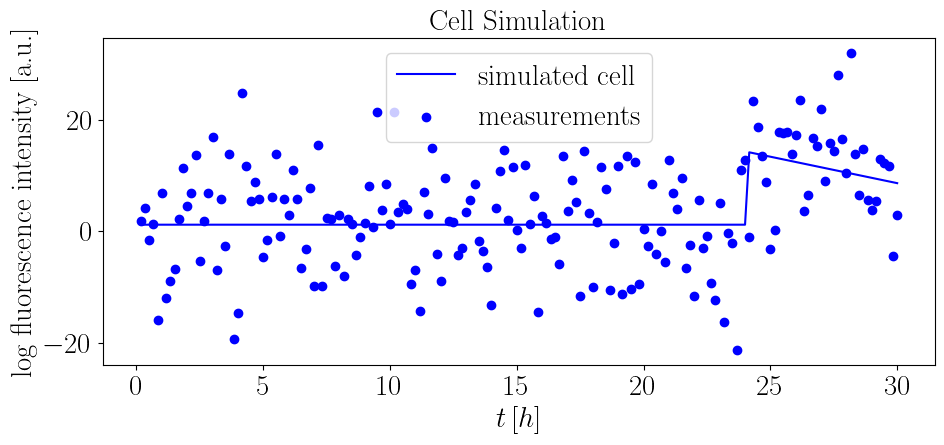

INFO:root:Performing 2 pilot runs with the DetailedFroehlichModel model...
INFO:root:Shape of parameter batch after 2 pilot simulations: (batch_size = 2, 11)
INFO:root:Shape of simulation batch after 2 pilot simulations: (batch_size = 2, 180, 1)
INFO:root:No optional prior non-batchable context provided.
INFO:root:No optional prior batchable context provided.
INFO:root:No optional simulation non-batchable context provided.
INFO:root:No optional simulation batchable context provided.
INFO:root:Loaded loss history from ../networks/amortizer-detailed-fro-sequence-summary-Bi-LSTM-7layers-2coupling-spline-500epochs_normal_2/history_329.pkl.
INFO:root:Networks loaded from ../networks/amortizer-detailed-fro-sequence-summary-Bi-LSTM-7layers-2coupling-spline-500epochs_normal_2/ckpt-329
INFO:root:Performing a consistency check with provided components...
INFO:root:Done.


Model: "amortized_posterior_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 invertible_network_1 (Inve  multiple                  769265    
 rtibleNetwork)                                                  
                                                                 
 sequence_network_1 (Sequen  multiple                  610614    
 ceNetwork)                                                      
                                                                 
Total params: 1379879 (5.26 MB)
Trainable params: 1379725 (5.26 MB)
Non-trainable params: 154 (616.00 Byte)
_________________________________________________________________
None


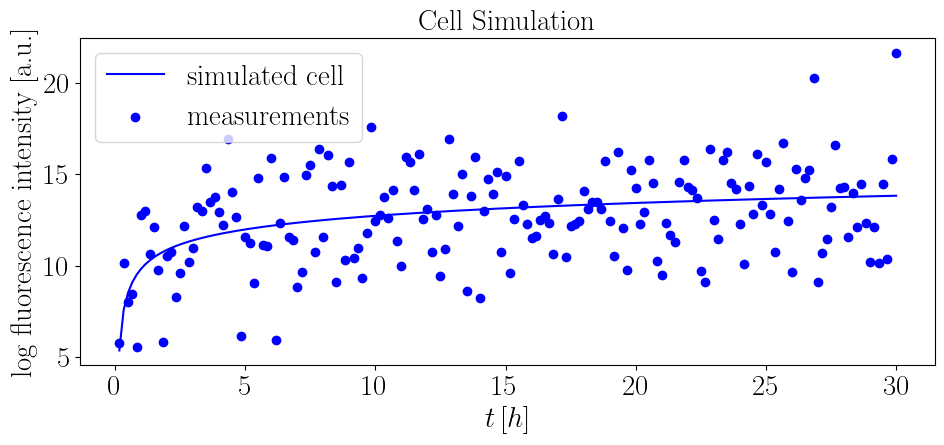

INFO:root:Performing 2 pilot runs with the SDEFroehlichModel model...
INFO:root:Shape of parameter batch after 2 pilot simulations: (batch_size = 2, 8)
INFO:root:Shape of simulation batch after 2 pilot simulations: (batch_size = 2, 180, 1)
INFO:root:No optional prior non-batchable context provided.
INFO:root:No optional prior batchable context provided.
INFO:root:No optional simulation non-batchable context provided.
INFO:root:No optional simulation batchable context provided.
INFO:root:Loaded loss history from ../networks/amortizer-sde-fro-sequence-summary-LSTM-7layers-3coupling-spline-500epochs_normal_2/history_259.pkl.
INFO:root:Networks loaded from ../networks/amortizer-sde-fro-sequence-summary-LSTM-7layers-3coupling-spline-500epochs_normal_2/ckpt-259
INFO:root:Performing a consistency check with provided components...
INFO:root:Done.


Model: "amortized_posterior_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 invertible_network_2 (Inve  multiple                  854168    
 rtibleNetwork)                                                  
                                                                 
 sequence_network_2 (Sequen  multiple                  307504    
 ceNetwork)                                                      
                                                                 
Total params: 1161672 (4.43 MB)
Trainable params: 1161560 (4.43 MB)
Non-trainable params: 112 (448.00 Byte)
_________________________________________________________________
None


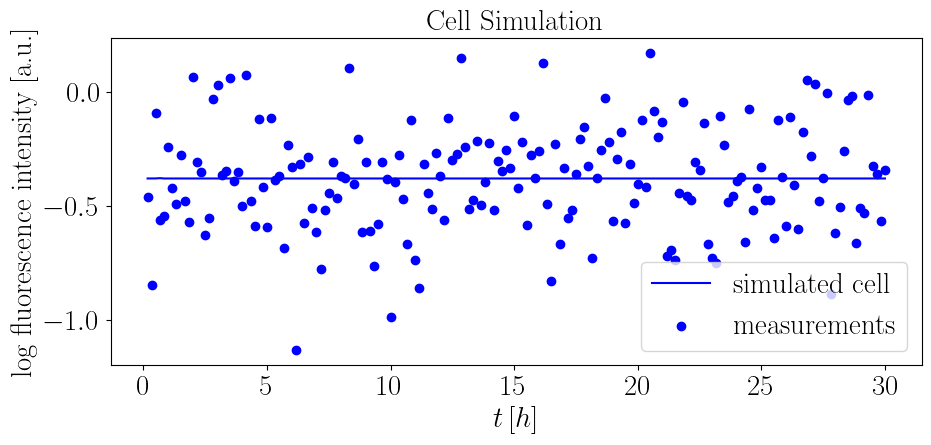

In [5]:
from models.froehlich_model_simple import FroehlichModelSimple
individual_model_simple = FroehlichModelSimple(load_best=True, prior_type=prior_type)
from models.froehlich_model_detailed import FroehlichModelDetailed
individual_model_detailed = FroehlichModelDetailed(load_best=True, prior_type=prior_type)
from models.froehlich_model_sde import FroehlichModelSDE
individual_model_sde = FroehlichModelSDE(load_best=True, prior_type=prior_type)    

# assemble simulator and prior
trainer_simple = individual_model_simple.build_trainer('../networks/' + individual_model_simple.network_name + '_' + prior_type)
individual_model_simple.plot_example()

trainer_detailed = individual_model_detailed.build_trainer('../networks/' + individual_model_detailed.network_name + '_' + prior_type)
individual_model_detailed.plot_example()

trainer_sde = individual_model_sde.build_trainer('../networks/' + individual_model_sde.network_name + '_' + prior_type)
individual_model_sde.plot_example()

In [6]:
obj_fun_amortized_simple = ObjectiveFunctionNLME(model_name=individual_model_simple.name,
                                          param_samples=np.empty((1,1,1)),
                                          prior_mean=individual_model_simple.prior_mean,
                                          prior_std=individual_model_simple.prior_std,
                                          covariance_format='diag',
                                          )
obj_fun_amortized_detailed = ObjectiveFunctionNLME(model_name=individual_model_detailed.name,
                                            param_samples=np.empty((1,1,1)),
                                            prior_mean=individual_model_detailed.prior_mean,
                                            prior_std=individual_model_detailed.prior_std,
                                            covariance_format='diag',
                                            )
obj_fun_amortized_sde = ObjectiveFunctionNLME(model_name=individual_model_sde.name,
                                            param_samples=np.empty((1,1,1)),
                                            prior_mean=individual_model_sde.prior_mean,
                                            prior_std=individual_model_sde.prior_std,
                                            covariance_format='diag',
                                            )

In [26]:
test_n_cells = [50, 100, 500, 5000, 5000] #10000]
n_samples_opt_list = [10, 50, 100, 250]
n_runs = 100
time_opt = np.ones((3, len(test_n_cells), len(n_samples_opt_list), n_runs)) * np.nan
amortized_error = np.ones((3, len(test_n_cells), len(n_samples_opt_list), n_runs)) * np.nan
amortized_var = np.ones((3, len(test_n_cells), len(n_samples_opt_list))) * np.nan
amortized_likelihood = np.ones((3, len(test_n_cells), len(n_samples_opt_list), n_runs)) * np.nan
amortized_params = np.ones((3, len(test_n_cells), len(n_samples_opt_list), n_runs, individual_model_detailed.n_params*2)) * np.nan
compute_relative_error = False  # relative to true parameter values
bi_modal = [[[0, 1, 6, 7], [1, 0, 7, 6]], 
            None,  
            None] #[[0, 1, 8, 9], [1, 0, 9, 8]]]
    
for m_i, individual_model in enumerate([individual_model_simple, individual_model_detailed, individual_model_sde]):
    for nc, n_cells in enumerate(test_n_cells):
        for ns, n_samples in enumerate(n_samples_opt_list):
            # load results
            filename = f'synthetic_results_amortized/{individual_model.name}_cells_{n_cells}_samples_{n_samples}_{prior_type}.hd5'
            result_optimization = store.read_result(filename)
            results_params = np.array(result_optimization.optimize_result.x)
            amortized_likelihood[m_i, nc, ns] = np.array(result_optimization.optimize_result.fval)
            #assert results_params.shape[0] == n_runs, f'number of runs ({n_runs}) does not match number of results ({results_params.shape[0]})'
                    
            # load true population parameters
            true_pop_parameters = individual_model.load_synthetic_parameter(n_data=n_cells)
            # set very small variances to 0.001
            true_pop_parameters[individual_model.n_params:][true_pop_parameters[individual_model.n_params:] < 0.001] = 0.001
            
            for i_r, res in enumerate(results_params):
                # transform results
                estimated_beta = res[:individual_model.n_params]
                estimated_var = np.exp(-res[individual_model.n_params:individual_model.n_params*2])
                amortized_params[m_i, nc, ns, i_r, :individual_model.n_params*2] = np.concatenate((estimated_beta, estimated_var))
                             
            # compute relative error of parameter estimated as minimum over multi_starts
            amortized_error[m_i, nc, ns] = compute_error_estimate(amortized_params[m_i, nc, ns, :, :individual_model.n_params*2],
                                                                true_pop_parameters,
                                                                bi_modal=bi_modal[m_i],
                                                                relative_error=compute_relative_error)
            amortized_error = np.sort(amortized_error, axis=-1)
            print(amortized_error)
            
            # if remove last 10 runs, as they are not converged, do them same for SAEM as well
            amortized_var[m_i, nc, ns] = np.nanvar(amortized_error) #
            amortized_var[m_i, nc, ns] = np.var(amortized_error[m_i, nc, ns, :50])
                 
            # get duration of optimization procedure (in seconds)
            time_opt[m_i, nc, ns] = np.array(result_optimization.optimize_result.time) / 60 / 60

This problem is not to be used without a separately created objective.
INFO:pypesto.store.read_from_hdf5:WARNING: You are loading a problem.
This problem is not to be used without a separately created objective.
Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/SimpleFroehlichModel_cells_50_samples_10_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/SimpleFroehlichModel_cells_50_samples_10_normal_2.hd5.
This problem is not to be used without a separately created objective.
INFO:pypesto.store.read_from_hdf5:WARNING: You are loading a problem.
This problem is not to be used without a separately created objective.
Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/SimpleFroehlichModel_cells_50_samples_50_normal_2.hd5.
Loading the sampling result failed. It is

[[[[7.73514981e-04 2.01272606e-03 2.87986784e-03 ... 5.29926448e+00
    7.06591939e+00 1.23794202e+01]
   [           nan            nan            nan ...            nan
               nan            nan]
   [           nan            nan            nan ...            nan
               nan            nan]
   [           nan            nan            nan ...            nan
               nan            nan]]

  [[           nan            nan            nan ...            nan
               nan            nan]
   [           nan            nan            nan ...            nan
               nan            nan]
   [           nan            nan            nan ...            nan
               nan            nan]
   [           nan            nan            nan ...            nan
               nan            nan]]

  [[           nan            nan            nan ...            nan
               nan            nan]
   [           nan            nan            nan ...            nan
 

Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/SimpleFroehlichModel_cells_50_samples_100_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/SimpleFroehlichModel_cells_50_samples_100_normal_2.hd5.
This problem is not to be used without a separately created objective.
INFO:pypesto.store.read_from_hdf5:WARNING: You are loading a problem.
This problem is not to be used without a separately created objective.
Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/SimpleFroehlichModel_cells_50_samples_250_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/SimpleFroehlichModel_cells_50_samples_250_normal_2.hd5.
This problem is not to be used without a separately created objective.
I

[[[[7.73514981e-04 2.01272606e-03 2.87986784e-03 ... 5.29926448e+00
    7.06591939e+00 1.23794202e+01]
   [1.00723645e-03 1.22324474e-03 1.48411832e-03 ... 1.55852038e+00
    1.83129893e+00 2.14802683e+00]
   [5.62833213e-04 6.25585518e-04 7.27393421e-04 ... 3.56881621e+00
    3.78724626e+00 8.54513700e+00]
   [           nan            nan            nan ...            nan
               nan            nan]]

  [[           nan            nan            nan ...            nan
               nan            nan]
   [           nan            nan            nan ...            nan
               nan            nan]
   [           nan            nan            nan ...            nan
               nan            nan]
   [           nan            nan            nan ...            nan
               nan            nan]]

  [[           nan            nan            nan ...            nan
               nan            nan]
   [           nan            nan            nan ...            nan
 

Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/SimpleFroehlichModel_cells_100_samples_10_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/SimpleFroehlichModel_cells_100_samples_10_normal_2.hd5.
This problem is not to be used without a separately created objective.
INFO:pypesto.store.read_from_hdf5:WARNING: You are loading a problem.
This problem is not to be used without a separately created objective.
Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/SimpleFroehlichModel_cells_100_samples_50_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/SimpleFroehlichModel_cells_100_samples_50_normal_2.hd5.
This problem is not to be used without a separately created objective.
I

[[[[7.73514981e-04 2.01272606e-03 2.87986784e-03 ... 5.29926448e+00
    7.06591939e+00 1.23794202e+01]
   [1.00723645e-03 1.22324474e-03 1.48411832e-03 ... 1.55852038e+00
    1.83129893e+00 2.14802683e+00]
   [5.62833213e-04 6.25585518e-04 7.27393421e-04 ... 3.56881621e+00
    3.78724626e+00 8.54513700e+00]
   [7.58073016e-04 1.02593311e-03 1.06165630e-03 ... 1.48264824e+00
    1.67673291e+00 4.04737443e+03]]

  [[5.64844165e-04 7.96590803e-04 1.62230226e-03 ... 1.98422653e+00
    2.31013301e+00 2.84817889e+00]
   [           nan            nan            nan ...            nan
               nan            nan]
   [           nan            nan            nan ...            nan
               nan            nan]
   [           nan            nan            nan ...            nan
               nan            nan]]

  [[           nan            nan            nan ...            nan
               nan            nan]
   [           nan            nan            nan ...            nan
 

Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/SimpleFroehlichModel_cells_100_samples_100_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/SimpleFroehlichModel_cells_100_samples_100_normal_2.hd5.
This problem is not to be used without a separately created objective.
INFO:pypesto.store.read_from_hdf5:WARNING: You are loading a problem.
This problem is not to be used without a separately created objective.
Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/SimpleFroehlichModel_cells_100_samples_250_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/SimpleFroehlichModel_cells_100_samples_250_normal_2.hd5.
This problem is not to be used without a separately created objectiv

[[[[7.73514981e-04 2.01272606e-03 2.87986784e-03 ... 5.29926448e+00
    7.06591939e+00 1.23794202e+01]
   [1.00723645e-03 1.22324474e-03 1.48411832e-03 ... 1.55852038e+00
    1.83129893e+00 2.14802683e+00]
   [5.62833213e-04 6.25585518e-04 7.27393421e-04 ... 3.56881621e+00
    3.78724626e+00 8.54513700e+00]
   [7.58073016e-04 1.02593311e-03 1.06165630e-03 ... 1.48264824e+00
    1.67673291e+00 4.04737443e+03]]

  [[5.64844165e-04 7.96590803e-04 1.62230226e-03 ... 1.98422653e+00
    2.31013301e+00 2.84817889e+00]
   [6.38141757e-04 1.12923286e-03 1.14299332e-03 ... 5.75253209e-01
    9.05579104e-01 1.28817509e+01]
   [6.00206052e-04 6.14570144e-04 6.60440122e-04 ... 3.64049714e-01
    4.05003452e-01 5.65801959e-01]
   [           nan            nan            nan ...            nan
               nan            nan]]

  [[           nan            nan            nan ...            nan
               nan            nan]
   [           nan            nan            nan ...            nan
 

Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/SimpleFroehlichModel_cells_500_samples_10_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/SimpleFroehlichModel_cells_500_samples_10_normal_2.hd5.
This problem is not to be used without a separately created objective.
INFO:pypesto.store.read_from_hdf5:WARNING: You are loading a problem.
This problem is not to be used without a separately created objective.
Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/SimpleFroehlichModel_cells_500_samples_50_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/SimpleFroehlichModel_cells_500_samples_50_normal_2.hd5.
This problem is not to be used without a separately created objective.
I

[[[[7.73514981e-04 2.01272606e-03 2.87986784e-03 ... 5.29926448e+00
    7.06591939e+00 1.23794202e+01]
   [1.00723645e-03 1.22324474e-03 1.48411832e-03 ... 1.55852038e+00
    1.83129893e+00 2.14802683e+00]
   [5.62833213e-04 6.25585518e-04 7.27393421e-04 ... 3.56881621e+00
    3.78724626e+00 8.54513700e+00]
   [7.58073016e-04 1.02593311e-03 1.06165630e-03 ... 1.48264824e+00
    1.67673291e+00 4.04737443e+03]]

  [[5.64844165e-04 7.96590803e-04 1.62230226e-03 ... 1.98422653e+00
    2.31013301e+00 2.84817889e+00]
   [6.38141757e-04 1.12923286e-03 1.14299332e-03 ... 5.75253209e-01
    9.05579104e-01 1.28817509e+01]
   [6.00206052e-04 6.14570144e-04 6.60440122e-04 ... 3.64049714e-01
    4.05003452e-01 5.65801959e-01]
   [4.98986789e-04 6.92842364e-04 7.27291044e-04 ... 2.70917709e-01
    2.80965014e-01 2.92183656e-01]]

  [[1.70082237e-03 2.08160029e-03 2.49275668e-03 ... 4.78110667e-01
    5.56558759e-01 7.88397527e-01]
   [           nan            nan            nan ...            nan
 

Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/SimpleFroehlichModel_cells_500_samples_100_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/SimpleFroehlichModel_cells_500_samples_100_normal_2.hd5.
This problem is not to be used without a separately created objective.
INFO:pypesto.store.read_from_hdf5:WARNING: You are loading a problem.
This problem is not to be used without a separately created objective.
Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/SimpleFroehlichModel_cells_500_samples_250_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/SimpleFroehlichModel_cells_500_samples_250_normal_2.hd5.
This problem is not to be used without a separately created objectiv

[[[[7.73514981e-04 2.01272606e-03 2.87986784e-03 ... 5.29926448e+00
    7.06591939e+00 1.23794202e+01]
   [1.00723645e-03 1.22324474e-03 1.48411832e-03 ... 1.55852038e+00
    1.83129893e+00 2.14802683e+00]
   [5.62833213e-04 6.25585518e-04 7.27393421e-04 ... 3.56881621e+00
    3.78724626e+00 8.54513700e+00]
   [7.58073016e-04 1.02593311e-03 1.06165630e-03 ... 1.48264824e+00
    1.67673291e+00 4.04737443e+03]]

  [[5.64844165e-04 7.96590803e-04 1.62230226e-03 ... 1.98422653e+00
    2.31013301e+00 2.84817889e+00]
   [6.38141757e-04 1.12923286e-03 1.14299332e-03 ... 5.75253209e-01
    9.05579104e-01 1.28817509e+01]
   [6.00206052e-04 6.14570144e-04 6.60440122e-04 ... 3.64049714e-01
    4.05003452e-01 5.65801959e-01]
   [4.98986789e-04 6.92842364e-04 7.27291044e-04 ... 2.70917709e-01
    2.80965014e-01 2.92183656e-01]]

  [[1.70082237e-03 2.08160029e-03 2.49275668e-03 ... 4.78110667e-01
    5.56558759e-01 7.88397527e-01]
   [7.68277483e-04 1.40055334e-03 1.47731549e-03 ... 1.33714478e-01
 

Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/SimpleFroehlichModel_cells_5000_samples_10_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/SimpleFroehlichModel_cells_5000_samples_10_normal_2.hd5.
This problem is not to be used without a separately created objective.
INFO:pypesto.store.read_from_hdf5:WARNING: You are loading a problem.
This problem is not to be used without a separately created objective.
Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/SimpleFroehlichModel_cells_5000_samples_50_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/SimpleFroehlichModel_cells_5000_samples_50_normal_2.hd5.
This problem is not to be used without a separately created objectiv

[[[[7.73514981e-04 2.01272606e-03 2.87986784e-03 ... 5.29926448e+00
    7.06591939e+00 1.23794202e+01]
   [1.00723645e-03 1.22324474e-03 1.48411832e-03 ... 1.55852038e+00
    1.83129893e+00 2.14802683e+00]
   [5.62833213e-04 6.25585518e-04 7.27393421e-04 ... 3.56881621e+00
    3.78724626e+00 8.54513700e+00]
   [7.58073016e-04 1.02593311e-03 1.06165630e-03 ... 1.48264824e+00
    1.67673291e+00 4.04737443e+03]]

  [[5.64844165e-04 7.96590803e-04 1.62230226e-03 ... 1.98422653e+00
    2.31013301e+00 2.84817889e+00]
   [6.38141757e-04 1.12923286e-03 1.14299332e-03 ... 5.75253209e-01
    9.05579104e-01 1.28817509e+01]
   [6.00206052e-04 6.14570144e-04 6.60440122e-04 ... 3.64049714e-01
    4.05003452e-01 5.65801959e-01]
   [4.98986789e-04 6.92842364e-04 7.27291044e-04 ... 2.70917709e-01
    2.80965014e-01 2.92183656e-01]]

  [[1.70082237e-03 2.08160029e-03 2.49275668e-03 ... 4.78110667e-01
    5.56558759e-01 7.88397527e-01]
   [7.68277483e-04 1.40055334e-03 1.47731549e-03 ... 1.33714478e-01
 

Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/SimpleFroehlichModel_cells_5000_samples_100_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/SimpleFroehlichModel_cells_5000_samples_100_normal_2.hd5.
This problem is not to be used without a separately created objective.
INFO:pypesto.store.read_from_hdf5:WARNING: You are loading a problem.
This problem is not to be used without a separately created objective.
Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/SimpleFroehlichModel_cells_5000_samples_250_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/SimpleFroehlichModel_cells_5000_samples_250_normal_2.hd5.
This problem is not to be used without a separately created obje

[[[[7.73514981e-04 2.01272606e-03 2.87986784e-03 ... 5.29926448e+00
    7.06591939e+00 1.23794202e+01]
   [1.00723645e-03 1.22324474e-03 1.48411832e-03 ... 1.55852038e+00
    1.83129893e+00 2.14802683e+00]
   [5.62833213e-04 6.25585518e-04 7.27393421e-04 ... 3.56881621e+00
    3.78724626e+00 8.54513700e+00]
   [7.58073016e-04 1.02593311e-03 1.06165630e-03 ... 1.48264824e+00
    1.67673291e+00 4.04737443e+03]]

  [[5.64844165e-04 7.96590803e-04 1.62230226e-03 ... 1.98422653e+00
    2.31013301e+00 2.84817889e+00]
   [6.38141757e-04 1.12923286e-03 1.14299332e-03 ... 5.75253209e-01
    9.05579104e-01 1.28817509e+01]
   [6.00206052e-04 6.14570144e-04 6.60440122e-04 ... 3.64049714e-01
    4.05003452e-01 5.65801959e-01]
   [4.98986789e-04 6.92842364e-04 7.27291044e-04 ... 2.70917709e-01
    2.80965014e-01 2.92183656e-01]]

  [[1.70082237e-03 2.08160029e-03 2.49275668e-03 ... 4.78110667e-01
    5.56558759e-01 7.88397527e-01]
   [7.68277483e-04 1.40055334e-03 1.47731549e-03 ... 1.33714478e-01
 

Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/SimpleFroehlichModel_cells_5000_samples_10_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/SimpleFroehlichModel_cells_5000_samples_10_normal_2.hd5.
This problem is not to be used without a separately created objective.
INFO:pypesto.store.read_from_hdf5:WARNING: You are loading a problem.
This problem is not to be used without a separately created objective.
Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/SimpleFroehlichModel_cells_5000_samples_50_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/SimpleFroehlichModel_cells_5000_samples_50_normal_2.hd5.
This problem is not to be used without a separately created objectiv

[[[[7.73514981e-04 2.01272606e-03 2.87986784e-03 ... 5.29926448e+00
    7.06591939e+00 1.23794202e+01]
   [1.00723645e-03 1.22324474e-03 1.48411832e-03 ... 1.55852038e+00
    1.83129893e+00 2.14802683e+00]
   [5.62833213e-04 6.25585518e-04 7.27393421e-04 ... 3.56881621e+00
    3.78724626e+00 8.54513700e+00]
   [7.58073016e-04 1.02593311e-03 1.06165630e-03 ... 1.48264824e+00
    1.67673291e+00 4.04737443e+03]]

  [[5.64844165e-04 7.96590803e-04 1.62230226e-03 ... 1.98422653e+00
    2.31013301e+00 2.84817889e+00]
   [6.38141757e-04 1.12923286e-03 1.14299332e-03 ... 5.75253209e-01
    9.05579104e-01 1.28817509e+01]
   [6.00206052e-04 6.14570144e-04 6.60440122e-04 ... 3.64049714e-01
    4.05003452e-01 5.65801959e-01]
   [4.98986789e-04 6.92842364e-04 7.27291044e-04 ... 2.70917709e-01
    2.80965014e-01 2.92183656e-01]]

  [[1.70082237e-03 2.08160029e-03 2.49275668e-03 ... 4.78110667e-01
    5.56558759e-01 7.88397527e-01]
   [7.68277483e-04 1.40055334e-03 1.47731549e-03 ... 1.33714478e-01
 

Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/SimpleFroehlichModel_cells_5000_samples_250_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/SimpleFroehlichModel_cells_5000_samples_250_normal_2.hd5.
This problem is not to be used without a separately created objective.
INFO:pypesto.store.read_from_hdf5:WARNING: You are loading a problem.
This problem is not to be used without a separately created objective.
Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/DetailedFroehlichModel_cells_50_samples_10_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/DetailedFroehlichModel_cells_50_samples_10_normal_2.hd5.
This problem is not to be used without a separately created object

[[[[7.73514981e-04 2.01272606e-03 2.87986784e-03 ... 5.29926448e+00
    7.06591939e+00 1.23794202e+01]
   [1.00723645e-03 1.22324474e-03 1.48411832e-03 ... 1.55852038e+00
    1.83129893e+00 2.14802683e+00]
   [5.62833213e-04 6.25585518e-04 7.27393421e-04 ... 3.56881621e+00
    3.78724626e+00 8.54513700e+00]
   [7.58073016e-04 1.02593311e-03 1.06165630e-03 ... 1.48264824e+00
    1.67673291e+00 4.04737443e+03]]

  [[5.64844165e-04 7.96590803e-04 1.62230226e-03 ... 1.98422653e+00
    2.31013301e+00 2.84817889e+00]
   [6.38141757e-04 1.12923286e-03 1.14299332e-03 ... 5.75253209e-01
    9.05579104e-01 1.28817509e+01]
   [6.00206052e-04 6.14570144e-04 6.60440122e-04 ... 3.64049714e-01
    4.05003452e-01 5.65801959e-01]
   [4.98986789e-04 6.92842364e-04 7.27291044e-04 ... 2.70917709e-01
    2.80965014e-01 2.92183656e-01]]

  [[1.70082237e-03 2.08160029e-03 2.49275668e-03 ... 4.78110667e-01
    5.56558759e-01 7.88397527e-01]
   [7.68277483e-04 1.40055334e-03 1.47731549e-03 ... 1.33714478e-01
 

Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/DetailedFroehlichModel_cells_50_samples_50_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/DetailedFroehlichModel_cells_50_samples_50_normal_2.hd5.
This problem is not to be used without a separately created objective.
INFO:pypesto.store.read_from_hdf5:WARNING: You are loading a problem.
This problem is not to be used without a separately created objective.
Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/DetailedFroehlichModel_cells_50_samples_100_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/DetailedFroehlichModel_cells_50_samples_100_normal_2.hd5.
This problem is not to be used without a separately created object

[[[[7.73514981e-04 2.01272606e-03 2.87986784e-03 ... 5.29926448e+00
    7.06591939e+00 1.23794202e+01]
   [1.00723645e-03 1.22324474e-03 1.48411832e-03 ... 1.55852038e+00
    1.83129893e+00 2.14802683e+00]
   [5.62833213e-04 6.25585518e-04 7.27393421e-04 ... 3.56881621e+00
    3.78724626e+00 8.54513700e+00]
   [7.58073016e-04 1.02593311e-03 1.06165630e-03 ... 1.48264824e+00
    1.67673291e+00 4.04737443e+03]]

  [[5.64844165e-04 7.96590803e-04 1.62230226e-03 ... 1.98422653e+00
    2.31013301e+00 2.84817889e+00]
   [6.38141757e-04 1.12923286e-03 1.14299332e-03 ... 5.75253209e-01
    9.05579104e-01 1.28817509e+01]
   [6.00206052e-04 6.14570144e-04 6.60440122e-04 ... 3.64049714e-01
    4.05003452e-01 5.65801959e-01]
   [4.98986789e-04 6.92842364e-04 7.27291044e-04 ... 2.70917709e-01
    2.80965014e-01 2.92183656e-01]]

  [[1.70082237e-03 2.08160029e-03 2.49275668e-03 ... 4.78110667e-01
    5.56558759e-01 7.88397527e-01]
   [7.68277483e-04 1.40055334e-03 1.47731549e-03 ... 1.33714478e-01
 

Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/DetailedFroehlichModel_cells_50_samples_250_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/DetailedFroehlichModel_cells_50_samples_250_normal_2.hd5.
This problem is not to be used without a separately created objective.
INFO:pypesto.store.read_from_hdf5:WARNING: You are loading a problem.
This problem is not to be used without a separately created objective.
Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/DetailedFroehlichModel_cells_100_samples_10_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/DetailedFroehlichModel_cells_100_samples_10_normal_2.hd5.
This problem is not to be used without a separately created obje

[[[[7.73514981e-04 2.01272606e-03 2.87986784e-03 ... 5.29926448e+00
    7.06591939e+00 1.23794202e+01]
   [1.00723645e-03 1.22324474e-03 1.48411832e-03 ... 1.55852038e+00
    1.83129893e+00 2.14802683e+00]
   [5.62833213e-04 6.25585518e-04 7.27393421e-04 ... 3.56881621e+00
    3.78724626e+00 8.54513700e+00]
   [7.58073016e-04 1.02593311e-03 1.06165630e-03 ... 1.48264824e+00
    1.67673291e+00 4.04737443e+03]]

  [[5.64844165e-04 7.96590803e-04 1.62230226e-03 ... 1.98422653e+00
    2.31013301e+00 2.84817889e+00]
   [6.38141757e-04 1.12923286e-03 1.14299332e-03 ... 5.75253209e-01
    9.05579104e-01 1.28817509e+01]
   [6.00206052e-04 6.14570144e-04 6.60440122e-04 ... 3.64049714e-01
    4.05003452e-01 5.65801959e-01]
   [4.98986789e-04 6.92842364e-04 7.27291044e-04 ... 2.70917709e-01
    2.80965014e-01 2.92183656e-01]]

  [[1.70082237e-03 2.08160029e-03 2.49275668e-03 ... 4.78110667e-01
    5.56558759e-01 7.88397527e-01]
   [7.68277483e-04 1.40055334e-03 1.47731549e-03 ... 1.33714478e-01
 

Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/DetailedFroehlichModel_cells_100_samples_50_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/DetailedFroehlichModel_cells_100_samples_50_normal_2.hd5.
This problem is not to be used without a separately created objective.
INFO:pypesto.store.read_from_hdf5:WARNING: You are loading a problem.
This problem is not to be used without a separately created objective.
Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/DetailedFroehlichModel_cells_100_samples_100_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/DetailedFroehlichModel_cells_100_samples_100_normal_2.hd5.
This problem is not to be used without a separately created ob

[[[[7.73514981e-04 2.01272606e-03 2.87986784e-03 ... 5.29926448e+00
    7.06591939e+00 1.23794202e+01]
   [1.00723645e-03 1.22324474e-03 1.48411832e-03 ... 1.55852038e+00
    1.83129893e+00 2.14802683e+00]
   [5.62833213e-04 6.25585518e-04 7.27393421e-04 ... 3.56881621e+00
    3.78724626e+00 8.54513700e+00]
   [7.58073016e-04 1.02593311e-03 1.06165630e-03 ... 1.48264824e+00
    1.67673291e+00 4.04737443e+03]]

  [[5.64844165e-04 7.96590803e-04 1.62230226e-03 ... 1.98422653e+00
    2.31013301e+00 2.84817889e+00]
   [6.38141757e-04 1.12923286e-03 1.14299332e-03 ... 5.75253209e-01
    9.05579104e-01 1.28817509e+01]
   [6.00206052e-04 6.14570144e-04 6.60440122e-04 ... 3.64049714e-01
    4.05003452e-01 5.65801959e-01]
   [4.98986789e-04 6.92842364e-04 7.27291044e-04 ... 2.70917709e-01
    2.80965014e-01 2.92183656e-01]]

  [[1.70082237e-03 2.08160029e-03 2.49275668e-03 ... 4.78110667e-01
    5.56558759e-01 7.88397527e-01]
   [7.68277483e-04 1.40055334e-03 1.47731549e-03 ... 1.33714478e-01
 

Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/DetailedFroehlichModel_cells_100_samples_250_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/DetailedFroehlichModel_cells_100_samples_250_normal_2.hd5.
This problem is not to be used without a separately created objective.
INFO:pypesto.store.read_from_hdf5:WARNING: You are loading a problem.
This problem is not to be used without a separately created objective.
Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/DetailedFroehlichModel_cells_500_samples_10_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/DetailedFroehlichModel_cells_500_samples_10_normal_2.hd5.
This problem is not to be used without a separately created ob

[[[[7.73514981e-04 2.01272606e-03 2.87986784e-03 ... 5.29926448e+00
    7.06591939e+00 1.23794202e+01]
   [1.00723645e-03 1.22324474e-03 1.48411832e-03 ... 1.55852038e+00
    1.83129893e+00 2.14802683e+00]
   [5.62833213e-04 6.25585518e-04 7.27393421e-04 ... 3.56881621e+00
    3.78724626e+00 8.54513700e+00]
   [7.58073016e-04 1.02593311e-03 1.06165630e-03 ... 1.48264824e+00
    1.67673291e+00 4.04737443e+03]]

  [[5.64844165e-04 7.96590803e-04 1.62230226e-03 ... 1.98422653e+00
    2.31013301e+00 2.84817889e+00]
   [6.38141757e-04 1.12923286e-03 1.14299332e-03 ... 5.75253209e-01
    9.05579104e-01 1.28817509e+01]
   [6.00206052e-04 6.14570144e-04 6.60440122e-04 ... 3.64049714e-01
    4.05003452e-01 5.65801959e-01]
   [4.98986789e-04 6.92842364e-04 7.27291044e-04 ... 2.70917709e-01
    2.80965014e-01 2.92183656e-01]]

  [[1.70082237e-03 2.08160029e-03 2.49275668e-03 ... 4.78110667e-01
    5.56558759e-01 7.88397527e-01]
   [7.68277483e-04 1.40055334e-03 1.47731549e-03 ... 1.33714478e-01
 

Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/DetailedFroehlichModel_cells_500_samples_50_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/DetailedFroehlichModel_cells_500_samples_50_normal_2.hd5.
This problem is not to be used without a separately created objective.
INFO:pypesto.store.read_from_hdf5:WARNING: You are loading a problem.
This problem is not to be used without a separately created objective.
Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/DetailedFroehlichModel_cells_500_samples_100_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/DetailedFroehlichModel_cells_500_samples_100_normal_2.hd5.
This problem is not to be used without a separately created ob

[[[[7.73514981e-04 2.01272606e-03 2.87986784e-03 ... 5.29926448e+00
    7.06591939e+00 1.23794202e+01]
   [1.00723645e-03 1.22324474e-03 1.48411832e-03 ... 1.55852038e+00
    1.83129893e+00 2.14802683e+00]
   [5.62833213e-04 6.25585518e-04 7.27393421e-04 ... 3.56881621e+00
    3.78724626e+00 8.54513700e+00]
   [7.58073016e-04 1.02593311e-03 1.06165630e-03 ... 1.48264824e+00
    1.67673291e+00 4.04737443e+03]]

  [[5.64844165e-04 7.96590803e-04 1.62230226e-03 ... 1.98422653e+00
    2.31013301e+00 2.84817889e+00]
   [6.38141757e-04 1.12923286e-03 1.14299332e-03 ... 5.75253209e-01
    9.05579104e-01 1.28817509e+01]
   [6.00206052e-04 6.14570144e-04 6.60440122e-04 ... 3.64049714e-01
    4.05003452e-01 5.65801959e-01]
   [4.98986789e-04 6.92842364e-04 7.27291044e-04 ... 2.70917709e-01
    2.80965014e-01 2.92183656e-01]]

  [[1.70082237e-03 2.08160029e-03 2.49275668e-03 ... 4.78110667e-01
    5.56558759e-01 7.88397527e-01]
   [7.68277483e-04 1.40055334e-03 1.47731549e-03 ... 1.33714478e-01
 

Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/DetailedFroehlichModel_cells_500_samples_250_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/DetailedFroehlichModel_cells_500_samples_250_normal_2.hd5.
This problem is not to be used without a separately created objective.
INFO:pypesto.store.read_from_hdf5:WARNING: You are loading a problem.
This problem is not to be used without a separately created objective.
Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/DetailedFroehlichModel_cells_5000_samples_10_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/DetailedFroehlichModel_cells_5000_samples_10_normal_2.hd5.
This problem is not to be used without a separately created 

[[[[7.73514981e-04 2.01272606e-03 2.87986784e-03 ... 5.29926448e+00
    7.06591939e+00 1.23794202e+01]
   [1.00723645e-03 1.22324474e-03 1.48411832e-03 ... 1.55852038e+00
    1.83129893e+00 2.14802683e+00]
   [5.62833213e-04 6.25585518e-04 7.27393421e-04 ... 3.56881621e+00
    3.78724626e+00 8.54513700e+00]
   [7.58073016e-04 1.02593311e-03 1.06165630e-03 ... 1.48264824e+00
    1.67673291e+00 4.04737443e+03]]

  [[5.64844165e-04 7.96590803e-04 1.62230226e-03 ... 1.98422653e+00
    2.31013301e+00 2.84817889e+00]
   [6.38141757e-04 1.12923286e-03 1.14299332e-03 ... 5.75253209e-01
    9.05579104e-01 1.28817509e+01]
   [6.00206052e-04 6.14570144e-04 6.60440122e-04 ... 3.64049714e-01
    4.05003452e-01 5.65801959e-01]
   [4.98986789e-04 6.92842364e-04 7.27291044e-04 ... 2.70917709e-01
    2.80965014e-01 2.92183656e-01]]

  [[1.70082237e-03 2.08160029e-03 2.49275668e-03 ... 4.78110667e-01
    5.56558759e-01 7.88397527e-01]
   [7.68277483e-04 1.40055334e-03 1.47731549e-03 ... 1.33714478e-01
 

Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/DetailedFroehlichModel_cells_5000_samples_50_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/DetailedFroehlichModel_cells_5000_samples_50_normal_2.hd5.
This problem is not to be used without a separately created objective.
INFO:pypesto.store.read_from_hdf5:WARNING: You are loading a problem.
This problem is not to be used without a separately created objective.
Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/DetailedFroehlichModel_cells_5000_samples_100_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/DetailedFroehlichModel_cells_5000_samples_100_normal_2.hd5.
This problem is not to be used without a separately create

[[[[7.73514981e-04 2.01272606e-03 2.87986784e-03 ... 5.29926448e+00
    7.06591939e+00 1.23794202e+01]
   [1.00723645e-03 1.22324474e-03 1.48411832e-03 ... 1.55852038e+00
    1.83129893e+00 2.14802683e+00]
   [5.62833213e-04 6.25585518e-04 7.27393421e-04 ... 3.56881621e+00
    3.78724626e+00 8.54513700e+00]
   [7.58073016e-04 1.02593311e-03 1.06165630e-03 ... 1.48264824e+00
    1.67673291e+00 4.04737443e+03]]

  [[5.64844165e-04 7.96590803e-04 1.62230226e-03 ... 1.98422653e+00
    2.31013301e+00 2.84817889e+00]
   [6.38141757e-04 1.12923286e-03 1.14299332e-03 ... 5.75253209e-01
    9.05579104e-01 1.28817509e+01]
   [6.00206052e-04 6.14570144e-04 6.60440122e-04 ... 3.64049714e-01
    4.05003452e-01 5.65801959e-01]
   [4.98986789e-04 6.92842364e-04 7.27291044e-04 ... 2.70917709e-01
    2.80965014e-01 2.92183656e-01]]

  [[1.70082237e-03 2.08160029e-03 2.49275668e-03 ... 4.78110667e-01
    5.56558759e-01 7.88397527e-01]
   [7.68277483e-04 1.40055334e-03 1.47731549e-03 ... 1.33714478e-01
 

Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/DetailedFroehlichModel_cells_5000_samples_250_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/DetailedFroehlichModel_cells_5000_samples_250_normal_2.hd5.
This problem is not to be used without a separately created objective.
INFO:pypesto.store.read_from_hdf5:WARNING: You are loading a problem.
This problem is not to be used without a separately created objective.
Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/DetailedFroehlichModel_cells_5000_samples_10_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/DetailedFroehlichModel_cells_5000_samples_10_normal_2.hd5.
This problem is not to be used without a separately create

[[[[7.73514981e-04 2.01272606e-03 2.87986784e-03 ... 5.29926448e+00
    7.06591939e+00 1.23794202e+01]
   [1.00723645e-03 1.22324474e-03 1.48411832e-03 ... 1.55852038e+00
    1.83129893e+00 2.14802683e+00]
   [5.62833213e-04 6.25585518e-04 7.27393421e-04 ... 3.56881621e+00
    3.78724626e+00 8.54513700e+00]
   [7.58073016e-04 1.02593311e-03 1.06165630e-03 ... 1.48264824e+00
    1.67673291e+00 4.04737443e+03]]

  [[5.64844165e-04 7.96590803e-04 1.62230226e-03 ... 1.98422653e+00
    2.31013301e+00 2.84817889e+00]
   [6.38141757e-04 1.12923286e-03 1.14299332e-03 ... 5.75253209e-01
    9.05579104e-01 1.28817509e+01]
   [6.00206052e-04 6.14570144e-04 6.60440122e-04 ... 3.64049714e-01
    4.05003452e-01 5.65801959e-01]
   [4.98986789e-04 6.92842364e-04 7.27291044e-04 ... 2.70917709e-01
    2.80965014e-01 2.92183656e-01]]

  [[1.70082237e-03 2.08160029e-03 2.49275668e-03 ... 4.78110667e-01
    5.56558759e-01 7.88397527e-01]
   [7.68277483e-04 1.40055334e-03 1.47731549e-03 ... 1.33714478e-01
 

Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/DetailedFroehlichModel_cells_5000_samples_100_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/DetailedFroehlichModel_cells_5000_samples_100_normal_2.hd5.
This problem is not to be used without a separately created objective.
INFO:pypesto.store.read_from_hdf5:WARNING: You are loading a problem.
This problem is not to be used without a separately created objective.
Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/DetailedFroehlichModel_cells_5000_samples_250_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/DetailedFroehlichModel_cells_5000_samples_250_normal_2.hd5.
This problem is not to be used without a separately crea

[[[[7.73514981e-04 2.01272606e-03 2.87986784e-03 ... 5.29926448e+00
    7.06591939e+00 1.23794202e+01]
   [1.00723645e-03 1.22324474e-03 1.48411832e-03 ... 1.55852038e+00
    1.83129893e+00 2.14802683e+00]
   [5.62833213e-04 6.25585518e-04 7.27393421e-04 ... 3.56881621e+00
    3.78724626e+00 8.54513700e+00]
   [7.58073016e-04 1.02593311e-03 1.06165630e-03 ... 1.48264824e+00
    1.67673291e+00 4.04737443e+03]]

  [[5.64844165e-04 7.96590803e-04 1.62230226e-03 ... 1.98422653e+00
    2.31013301e+00 2.84817889e+00]
   [6.38141757e-04 1.12923286e-03 1.14299332e-03 ... 5.75253209e-01
    9.05579104e-01 1.28817509e+01]
   [6.00206052e-04 6.14570144e-04 6.60440122e-04 ... 3.64049714e-01
    4.05003452e-01 5.65801959e-01]
   [4.98986789e-04 6.92842364e-04 7.27291044e-04 ... 2.70917709e-01
    2.80965014e-01 2.92183656e-01]]

  [[1.70082237e-03 2.08160029e-03 2.49275668e-03 ... 4.78110667e-01
    5.56558759e-01 7.88397527e-01]
   [7.68277483e-04 1.40055334e-03 1.47731549e-03 ... 1.33714478e-01
 

This problem is not to be used without a separately created objective.
INFO:pypesto.store.read_from_hdf5:WARNING: You are loading a problem.
This problem is not to be used without a separately created objective.
Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/SDEFroehlichModel_cells_50_samples_50_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/SDEFroehlichModel_cells_50_samples_50_normal_2.hd5.
This problem is not to be used without a separately created objective.
INFO:pypesto.store.read_from_hdf5:WARNING: You are loading a problem.
This problem is not to be used without a separately created objective.


[[[[7.73514981e-04 2.01272606e-03 2.87986784e-03 ... 5.29926448e+00
    7.06591939e+00 1.23794202e+01]
   [1.00723645e-03 1.22324474e-03 1.48411832e-03 ... 1.55852038e+00
    1.83129893e+00 2.14802683e+00]
   [5.62833213e-04 6.25585518e-04 7.27393421e-04 ... 3.56881621e+00
    3.78724626e+00 8.54513700e+00]
   [7.58073016e-04 1.02593311e-03 1.06165630e-03 ... 1.48264824e+00
    1.67673291e+00 4.04737443e+03]]

  [[5.64844165e-04 7.96590803e-04 1.62230226e-03 ... 1.98422653e+00
    2.31013301e+00 2.84817889e+00]
   [6.38141757e-04 1.12923286e-03 1.14299332e-03 ... 5.75253209e-01
    9.05579104e-01 1.28817509e+01]
   [6.00206052e-04 6.14570144e-04 6.60440122e-04 ... 3.64049714e-01
    4.05003452e-01 5.65801959e-01]
   [4.98986789e-04 6.92842364e-04 7.27291044e-04 ... 2.70917709e-01
    2.80965014e-01 2.92183656e-01]]

  [[1.70082237e-03 2.08160029e-03 2.49275668e-03 ... 4.78110667e-01
    5.56558759e-01 7.88397527e-01]
   [7.68277483e-04 1.40055334e-03 1.47731549e-03 ... 1.33714478e-01
 

Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/SDEFroehlichModel_cells_50_samples_100_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/SDEFroehlichModel_cells_50_samples_100_normal_2.hd5.
This problem is not to be used without a separately created objective.
INFO:pypesto.store.read_from_hdf5:WARNING: You are loading a problem.
This problem is not to be used without a separately created objective.
Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/SDEFroehlichModel_cells_50_samples_250_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/SDEFroehlichModel_cells_50_samples_250_normal_2.hd5.
This problem is not to be used without a separately created objective.
INFO:pypesto.

[[[[7.73514981e-04 2.01272606e-03 2.87986784e-03 ... 5.29926448e+00
    7.06591939e+00 1.23794202e+01]
   [1.00723645e-03 1.22324474e-03 1.48411832e-03 ... 1.55852038e+00
    1.83129893e+00 2.14802683e+00]
   [5.62833213e-04 6.25585518e-04 7.27393421e-04 ... 3.56881621e+00
    3.78724626e+00 8.54513700e+00]
   [7.58073016e-04 1.02593311e-03 1.06165630e-03 ... 1.48264824e+00
    1.67673291e+00 4.04737443e+03]]

  [[5.64844165e-04 7.96590803e-04 1.62230226e-03 ... 1.98422653e+00
    2.31013301e+00 2.84817889e+00]
   [6.38141757e-04 1.12923286e-03 1.14299332e-03 ... 5.75253209e-01
    9.05579104e-01 1.28817509e+01]
   [6.00206052e-04 6.14570144e-04 6.60440122e-04 ... 3.64049714e-01
    4.05003452e-01 5.65801959e-01]
   [4.98986789e-04 6.92842364e-04 7.27291044e-04 ... 2.70917709e-01
    2.80965014e-01 2.92183656e-01]]

  [[1.70082237e-03 2.08160029e-03 2.49275668e-03 ... 4.78110667e-01
    5.56558759e-01 7.88397527e-01]
   [7.68277483e-04 1.40055334e-03 1.47731549e-03 ... 1.33714478e-01
 

Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/SDEFroehlichModel_cells_100_samples_10_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/SDEFroehlichModel_cells_100_samples_10_normal_2.hd5.
This problem is not to be used without a separately created objective.
INFO:pypesto.store.read_from_hdf5:WARNING: You are loading a problem.
This problem is not to be used without a separately created objective.
Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/SDEFroehlichModel_cells_100_samples_50_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/SDEFroehlichModel_cells_100_samples_50_normal_2.hd5.
This problem is not to be used without a separately created objective.
INFO:pypesto.

[[[[7.73514981e-04 2.01272606e-03 2.87986784e-03 ... 5.29926448e+00
    7.06591939e+00 1.23794202e+01]
   [1.00723645e-03 1.22324474e-03 1.48411832e-03 ... 1.55852038e+00
    1.83129893e+00 2.14802683e+00]
   [5.62833213e-04 6.25585518e-04 7.27393421e-04 ... 3.56881621e+00
    3.78724626e+00 8.54513700e+00]
   [7.58073016e-04 1.02593311e-03 1.06165630e-03 ... 1.48264824e+00
    1.67673291e+00 4.04737443e+03]]

  [[5.64844165e-04 7.96590803e-04 1.62230226e-03 ... 1.98422653e+00
    2.31013301e+00 2.84817889e+00]
   [6.38141757e-04 1.12923286e-03 1.14299332e-03 ... 5.75253209e-01
    9.05579104e-01 1.28817509e+01]
   [6.00206052e-04 6.14570144e-04 6.60440122e-04 ... 3.64049714e-01
    4.05003452e-01 5.65801959e-01]
   [4.98986789e-04 6.92842364e-04 7.27291044e-04 ... 2.70917709e-01
    2.80965014e-01 2.92183656e-01]]

  [[1.70082237e-03 2.08160029e-03 2.49275668e-03 ... 4.78110667e-01
    5.56558759e-01 7.88397527e-01]
   [7.68277483e-04 1.40055334e-03 1.47731549e-03 ... 1.33714478e-01
 

Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/SDEFroehlichModel_cells_100_samples_100_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/SDEFroehlichModel_cells_100_samples_100_normal_2.hd5.
This problem is not to be used without a separately created objective.
INFO:pypesto.store.read_from_hdf5:WARNING: You are loading a problem.
This problem is not to be used without a separately created objective.
Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/SDEFroehlichModel_cells_100_samples_250_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/SDEFroehlichModel_cells_100_samples_250_normal_2.hd5.
This problem is not to be used without a separately created objective.
INFO:pype

[[[[7.73514981e-04 2.01272606e-03 2.87986784e-03 ... 5.29926448e+00
    7.06591939e+00 1.23794202e+01]
   [1.00723645e-03 1.22324474e-03 1.48411832e-03 ... 1.55852038e+00
    1.83129893e+00 2.14802683e+00]
   [5.62833213e-04 6.25585518e-04 7.27393421e-04 ... 3.56881621e+00
    3.78724626e+00 8.54513700e+00]
   [7.58073016e-04 1.02593311e-03 1.06165630e-03 ... 1.48264824e+00
    1.67673291e+00 4.04737443e+03]]

  [[5.64844165e-04 7.96590803e-04 1.62230226e-03 ... 1.98422653e+00
    2.31013301e+00 2.84817889e+00]
   [6.38141757e-04 1.12923286e-03 1.14299332e-03 ... 5.75253209e-01
    9.05579104e-01 1.28817509e+01]
   [6.00206052e-04 6.14570144e-04 6.60440122e-04 ... 3.64049714e-01
    4.05003452e-01 5.65801959e-01]
   [4.98986789e-04 6.92842364e-04 7.27291044e-04 ... 2.70917709e-01
    2.80965014e-01 2.92183656e-01]]

  [[1.70082237e-03 2.08160029e-03 2.49275668e-03 ... 4.78110667e-01
    5.56558759e-01 7.88397527e-01]
   [7.68277483e-04 1.40055334e-03 1.47731549e-03 ... 1.33714478e-01
 

Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/SDEFroehlichModel_cells_500_samples_10_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/SDEFroehlichModel_cells_500_samples_10_normal_2.hd5.
This problem is not to be used without a separately created objective.
INFO:pypesto.store.read_from_hdf5:WARNING: You are loading a problem.
This problem is not to be used without a separately created objective.
Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/SDEFroehlichModel_cells_500_samples_50_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/SDEFroehlichModel_cells_500_samples_50_normal_2.hd5.
This problem is not to be used without a separately created objective.
INFO:pypesto.

[[[[7.73514981e-04 2.01272606e-03 2.87986784e-03 ... 5.29926448e+00
    7.06591939e+00 1.23794202e+01]
   [1.00723645e-03 1.22324474e-03 1.48411832e-03 ... 1.55852038e+00
    1.83129893e+00 2.14802683e+00]
   [5.62833213e-04 6.25585518e-04 7.27393421e-04 ... 3.56881621e+00
    3.78724626e+00 8.54513700e+00]
   [7.58073016e-04 1.02593311e-03 1.06165630e-03 ... 1.48264824e+00
    1.67673291e+00 4.04737443e+03]]

  [[5.64844165e-04 7.96590803e-04 1.62230226e-03 ... 1.98422653e+00
    2.31013301e+00 2.84817889e+00]
   [6.38141757e-04 1.12923286e-03 1.14299332e-03 ... 5.75253209e-01
    9.05579104e-01 1.28817509e+01]
   [6.00206052e-04 6.14570144e-04 6.60440122e-04 ... 3.64049714e-01
    4.05003452e-01 5.65801959e-01]
   [4.98986789e-04 6.92842364e-04 7.27291044e-04 ... 2.70917709e-01
    2.80965014e-01 2.92183656e-01]]

  [[1.70082237e-03 2.08160029e-03 2.49275668e-03 ... 4.78110667e-01
    5.56558759e-01 7.88397527e-01]
   [7.68277483e-04 1.40055334e-03 1.47731549e-03 ... 1.33714478e-01
 

Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/SDEFroehlichModel_cells_500_samples_100_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/SDEFroehlichModel_cells_500_samples_100_normal_2.hd5.
This problem is not to be used without a separately created objective.
INFO:pypesto.store.read_from_hdf5:WARNING: You are loading a problem.
This problem is not to be used without a separately created objective.
Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/SDEFroehlichModel_cells_500_samples_250_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/SDEFroehlichModel_cells_500_samples_250_normal_2.hd5.
This problem is not to be used without a separately created objective.
INFO:pype

[[[[7.73514981e-04 2.01272606e-03 2.87986784e-03 ... 5.29926448e+00
    7.06591939e+00 1.23794202e+01]
   [1.00723645e-03 1.22324474e-03 1.48411832e-03 ... 1.55852038e+00
    1.83129893e+00 2.14802683e+00]
   [5.62833213e-04 6.25585518e-04 7.27393421e-04 ... 3.56881621e+00
    3.78724626e+00 8.54513700e+00]
   [7.58073016e-04 1.02593311e-03 1.06165630e-03 ... 1.48264824e+00
    1.67673291e+00 4.04737443e+03]]

  [[5.64844165e-04 7.96590803e-04 1.62230226e-03 ... 1.98422653e+00
    2.31013301e+00 2.84817889e+00]
   [6.38141757e-04 1.12923286e-03 1.14299332e-03 ... 5.75253209e-01
    9.05579104e-01 1.28817509e+01]
   [6.00206052e-04 6.14570144e-04 6.60440122e-04 ... 3.64049714e-01
    4.05003452e-01 5.65801959e-01]
   [4.98986789e-04 6.92842364e-04 7.27291044e-04 ... 2.70917709e-01
    2.80965014e-01 2.92183656e-01]]

  [[1.70082237e-03 2.08160029e-03 2.49275668e-03 ... 4.78110667e-01
    5.56558759e-01 7.88397527e-01]
   [7.68277483e-04 1.40055334e-03 1.47731549e-03 ... 1.33714478e-01
 

Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/SDEFroehlichModel_cells_5000_samples_10_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/SDEFroehlichModel_cells_5000_samples_10_normal_2.hd5.
This problem is not to be used without a separately created objective.
INFO:pypesto.store.read_from_hdf5:WARNING: You are loading a problem.
This problem is not to be used without a separately created objective.
Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/SDEFroehlichModel_cells_5000_samples_50_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/SDEFroehlichModel_cells_5000_samples_50_normal_2.hd5.
This problem is not to be used without a separately created objective.
INFO:pype

[[[[7.73514981e-04 2.01272606e-03 2.87986784e-03 ... 5.29926448e+00
    7.06591939e+00 1.23794202e+01]
   [1.00723645e-03 1.22324474e-03 1.48411832e-03 ... 1.55852038e+00
    1.83129893e+00 2.14802683e+00]
   [5.62833213e-04 6.25585518e-04 7.27393421e-04 ... 3.56881621e+00
    3.78724626e+00 8.54513700e+00]
   [7.58073016e-04 1.02593311e-03 1.06165630e-03 ... 1.48264824e+00
    1.67673291e+00 4.04737443e+03]]

  [[5.64844165e-04 7.96590803e-04 1.62230226e-03 ... 1.98422653e+00
    2.31013301e+00 2.84817889e+00]
   [6.38141757e-04 1.12923286e-03 1.14299332e-03 ... 5.75253209e-01
    9.05579104e-01 1.28817509e+01]
   [6.00206052e-04 6.14570144e-04 6.60440122e-04 ... 3.64049714e-01
    4.05003452e-01 5.65801959e-01]
   [4.98986789e-04 6.92842364e-04 7.27291044e-04 ... 2.70917709e-01
    2.80965014e-01 2.92183656e-01]]

  [[1.70082237e-03 2.08160029e-03 2.49275668e-03 ... 4.78110667e-01
    5.56558759e-01 7.88397527e-01]
   [7.68277483e-04 1.40055334e-03 1.47731549e-03 ... 1.33714478e-01
 

Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/SDEFroehlichModel_cells_5000_samples_100_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/SDEFroehlichModel_cells_5000_samples_100_normal_2.hd5.
This problem is not to be used without a separately created objective.
INFO:pypesto.store.read_from_hdf5:WARNING: You are loading a problem.
This problem is not to be used without a separately created objective.
Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/SDEFroehlichModel_cells_5000_samples_250_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/SDEFroehlichModel_cells_5000_samples_250_normal_2.hd5.
This problem is not to be used without a separately created objective.
INFO:

[[[[7.73514981e-04 2.01272606e-03 2.87986784e-03 ... 5.29926448e+00
    7.06591939e+00 1.23794202e+01]
   [1.00723645e-03 1.22324474e-03 1.48411832e-03 ... 1.55852038e+00
    1.83129893e+00 2.14802683e+00]
   [5.62833213e-04 6.25585518e-04 7.27393421e-04 ... 3.56881621e+00
    3.78724626e+00 8.54513700e+00]
   [7.58073016e-04 1.02593311e-03 1.06165630e-03 ... 1.48264824e+00
    1.67673291e+00 4.04737443e+03]]

  [[5.64844165e-04 7.96590803e-04 1.62230226e-03 ... 1.98422653e+00
    2.31013301e+00 2.84817889e+00]
   [6.38141757e-04 1.12923286e-03 1.14299332e-03 ... 5.75253209e-01
    9.05579104e-01 1.28817509e+01]
   [6.00206052e-04 6.14570144e-04 6.60440122e-04 ... 3.64049714e-01
    4.05003452e-01 5.65801959e-01]
   [4.98986789e-04 6.92842364e-04 7.27291044e-04 ... 2.70917709e-01
    2.80965014e-01 2.92183656e-01]]

  [[1.70082237e-03 2.08160029e-03 2.49275668e-03 ... 4.78110667e-01
    5.56558759e-01 7.88397527e-01]
   [7.68277483e-04 1.40055334e-03 1.47731549e-03 ... 1.33714478e-01
 

Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/SDEFroehlichModel_cells_5000_samples_10_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/SDEFroehlichModel_cells_5000_samples_10_normal_2.hd5.
This problem is not to be used without a separately created objective.
INFO:pypesto.store.read_from_hdf5:WARNING: You are loading a problem.
This problem is not to be used without a separately created objective.
Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/SDEFroehlichModel_cells_5000_samples_50_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/SDEFroehlichModel_cells_5000_samples_50_normal_2.hd5.
This problem is not to be used without a separately created objective.
INFO:pype

[[[[7.73514981e-04 2.01272606e-03 2.87986784e-03 ... 5.29926448e+00
    7.06591939e+00 1.23794202e+01]
   [1.00723645e-03 1.22324474e-03 1.48411832e-03 ... 1.55852038e+00
    1.83129893e+00 2.14802683e+00]
   [5.62833213e-04 6.25585518e-04 7.27393421e-04 ... 3.56881621e+00
    3.78724626e+00 8.54513700e+00]
   [7.58073016e-04 1.02593311e-03 1.06165630e-03 ... 1.48264824e+00
    1.67673291e+00 4.04737443e+03]]

  [[5.64844165e-04 7.96590803e-04 1.62230226e-03 ... 1.98422653e+00
    2.31013301e+00 2.84817889e+00]
   [6.38141757e-04 1.12923286e-03 1.14299332e-03 ... 5.75253209e-01
    9.05579104e-01 1.28817509e+01]
   [6.00206052e-04 6.14570144e-04 6.60440122e-04 ... 3.64049714e-01
    4.05003452e-01 5.65801959e-01]
   [4.98986789e-04 6.92842364e-04 7.27291044e-04 ... 2.70917709e-01
    2.80965014e-01 2.92183656e-01]]

  [[1.70082237e-03 2.08160029e-03 2.49275668e-03 ... 4.78110667e-01
    5.56558759e-01 7.88397527e-01]
   [7.68277483e-04 1.40055334e-03 1.47731549e-03 ... 1.33714478e-01
 

Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/SDEFroehlichModel_cells_5000_samples_250_normal_2.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/SDEFroehlichModel_cells_5000_samples_250_normal_2.hd5.


[[[[7.73514981e-04 2.01272606e-03 2.87986784e-03 ... 5.29926448e+00
    7.06591939e+00 1.23794202e+01]
   [1.00723645e-03 1.22324474e-03 1.48411832e-03 ... 1.55852038e+00
    1.83129893e+00 2.14802683e+00]
   [5.62833213e-04 6.25585518e-04 7.27393421e-04 ... 3.56881621e+00
    3.78724626e+00 8.54513700e+00]
   [7.58073016e-04 1.02593311e-03 1.06165630e-03 ... 1.48264824e+00
    1.67673291e+00 4.04737443e+03]]

  [[5.64844165e-04 7.96590803e-04 1.62230226e-03 ... 1.98422653e+00
    2.31013301e+00 2.84817889e+00]
   [6.38141757e-04 1.12923286e-03 1.14299332e-03 ... 5.75253209e-01
    9.05579104e-01 1.28817509e+01]
   [6.00206052e-04 6.14570144e-04 6.60440122e-04 ... 3.64049714e-01
    4.05003452e-01 5.65801959e-01]
   [4.98986789e-04 6.92842364e-04 7.27291044e-04 ... 2.70917709e-01
    2.80965014e-01 2.92183656e-01]]

  [[1.70082237e-03 2.08160029e-03 2.49275668e-03 ... 4.78110667e-01
    5.56558759e-01 7.88397527e-01]
   [7.68277483e-04 1.40055334e-03 1.47731549e-03 ... 1.33714478e-01
 

In [27]:
# read results from monolix
monolix_errors = np.ones((2, len(test_n_cells))) * np.nan
monolix_var = np.ones((2, len(test_n_cells))) * np.nan
timing_monolix = np.ones((2, len(test_n_cells), n_runs)) * np.nan
timing_monolix_median = np.ones((2, len(test_n_cells))) * np.nan
timing_monolix_var = np.ones((2, len(test_n_cells))) * np.nan
monolix_params = np.ones((3, len(test_n_cells), n_runs, individual_model_detailed.n_params*2)) * np.nan
monolix_likelihoods = np.ones((3, len(test_n_cells), n_runs)) * np.nan

for m_i, individual_model in enumerate([individual_model_simple, individual_model_detailed]):
    if 'simple' in model_names[m_i]:
        monolix_names = {"a": 5, "delta_pop": 0,"gamma_pop": 1,"km0scale_pop": 2,"offset_pop": 4,"omega_delta": 6,
                 "omega_gamma": 7, "omega_km0scale": 8, "omega_offset": 10, "omega_tBegin": 9, "tBegin_pop": 3}
    elif 'detailed' in model_names[m_i]:
        monolix_names = {"a": 10,"delta1m0_pop": 0,"delta2_pop": 1,"e0_m0_pop": 2,"gamma_pop": 7,"k1m0_pop": 5,"k2_pop": 4,"k2m0scale_pop": 3,"offset_pop": 9,"omega_delta1m0": 11,"omega_delta2": 12,"omega_e0_m0": 13,"omega_gamma": 18,"omega_k1m0": 16,"omega_k2": 15,"omega_k2m0scale": 14,"omega_offset": 20,"omega_r0_m0": 17,"omega_tBegin": 19,"r0_m0_pop": 6,"tBegin_pop": 8}
    else:
        raise NotImplementedError('model not implemented')
    reorder_monolix_params = sorted(monolix_names, key=monolix_names.get)
    
    for cell_idx, n_cells in enumerate(test_n_cells):    
        estimates_monolix = pd.read_csv(f'synthetic_results_monolix/model_analysis/projects/froehlich/'
                                        f'{model_names[m_i][9:]}/synthetic_{n_cells}/other/synthetic_{n_cells}_population_parameters.csv', 
                                        index_col=0, header=0)
        estimates_monolix = estimates_monolix[reorder_monolix_params]
        print(estimates_monolix.columns)
        print(individual_model.param_names)
        
        true_pop_parameters = individual_model.load_synthetic_parameter(n_data=n_cells)
        # set very small variances to 0.001
        true_pop_parameters[individual_model.n_params:][true_pop_parameters[individual_model.n_params:] < 0.001] = 0.001
    
        results_to_compare = []
        for row_id, row in estimates_monolix.iterrows():
            temp_res = row.values #[reorder_monolix_params]
            # standard deviation is not on log-scale
            temp_res[individual_model.n_params-1] = np.log(np.abs(temp_res[individual_model.n_params-1]))
            temp_res = np.concatenate((temp_res, [0.001]))  # add variance of noise
            results_to_compare.append(temp_res)
        results_to_compare = results_to_compare[:n_runs]

        monolix_params[m_i, cell_idx, :len(results_to_compare), :individual_model.n_params*2] = results_to_compare
        error_mono = compute_error_estimate(np.array(results_to_compare), 
                                            true_pop_parameters, 
                                            bi_modal=bi_modal[m_i],
                                            relative_error=compute_relative_error)
        # take min over multi-starts
        error_mono.sort()
        monolix_errors[m_i, cell_idx] = np.nanmedian(error_mono)
        monolix_var[m_i, cell_idx] = np.nanvar(error_mono) #[:-10])
    
        # results are sorted
        best_runs = pd.read_csv(f'synthetic_results_monolix/model_analysis/projects/froehlich/'
                            f'{model_names[m_i][9:]}/synthetic_{n_cells}/other/synthetic_{n_cells}_likelihoods.csv', 
                                        index_col=0, header=0)['run']
        likelihoods = pd.read_csv(f'synthetic_results_monolix/model_analysis/projects/froehlich/'
                            f'{model_names[m_i][9:]}/synthetic_{n_cells}/other/synthetic_{n_cells}_likelihoods.csv', 
                                        index_col=0, header=0)['OFV'].values

        likelihoods.sort()
        monolix_likelihoods[m_i, cell_idx, :len(likelihoods[:100])] = likelihoods[:100]
        
        # get timing        
        timing_monolix_df = pd.read_csv(f'synthetic_results_monolix/model_analysis/projects/froehlich/'
                                        f'{model_names[m_i][9:]}/synthetic_{n_cells}/other/synthetic_{n_cells}_walltimes.csv', 
                                        header=0)[:100]
        timing_monolix[m_i, cell_idx, :len(timing_monolix_df.saem.values)] = timing_monolix_df.saem.values / 60 / 60  # in hours
        timing_monolix_median[m_i, cell_idx] = np.nanmedian(timing_monolix_df.saem / 60 / 60)  # in hours
        timing_monolix_var[m_i, cell_idx] = np.nanstd(timing_monolix_df.saem / 60 / 60)  # in hours

Index(['delta_pop', 'gamma_pop', 'km0scale_pop', 'tBegin_pop', 'offset_pop',
       'a', 'omega_delta', 'omega_gamma', 'omega_km0scale', 'omega_tBegin',
       'omega_offset'],
      dtype='object')
['$\\delta$', '$\\gamma$', '$k m_0$-scale', '$t_0$', 'offset', '$\\sigma$']
Index(['delta_pop', 'gamma_pop', 'km0scale_pop', 'tBegin_pop', 'offset_pop',
       'a', 'omega_delta', 'omega_gamma', 'omega_km0scale', 'omega_tBegin',
       'omega_offset'],
      dtype='object')
['$\\delta$', '$\\gamma$', '$k m_0$-scale', '$t_0$', 'offset', '$\\sigma$']
Index(['delta_pop', 'gamma_pop', 'km0scale_pop', 'tBegin_pop', 'offset_pop',
       'a', 'omega_delta', 'omega_gamma', 'omega_km0scale', 'omega_tBegin',
       'omega_offset'],
      dtype='object')
['$\\delta$', '$\\gamma$', '$k m_0$-scale', '$t_0$', 'offset', '$\\sigma$']
Index(['delta_pop', 'gamma_pop', 'km0scale_pop', 'tBegin_pop', 'offset_pop',
       'a', 'omega_delta', 'omega_gamma', 'omega_km0scale', 'omega_tBegin',
       'omega_offset']

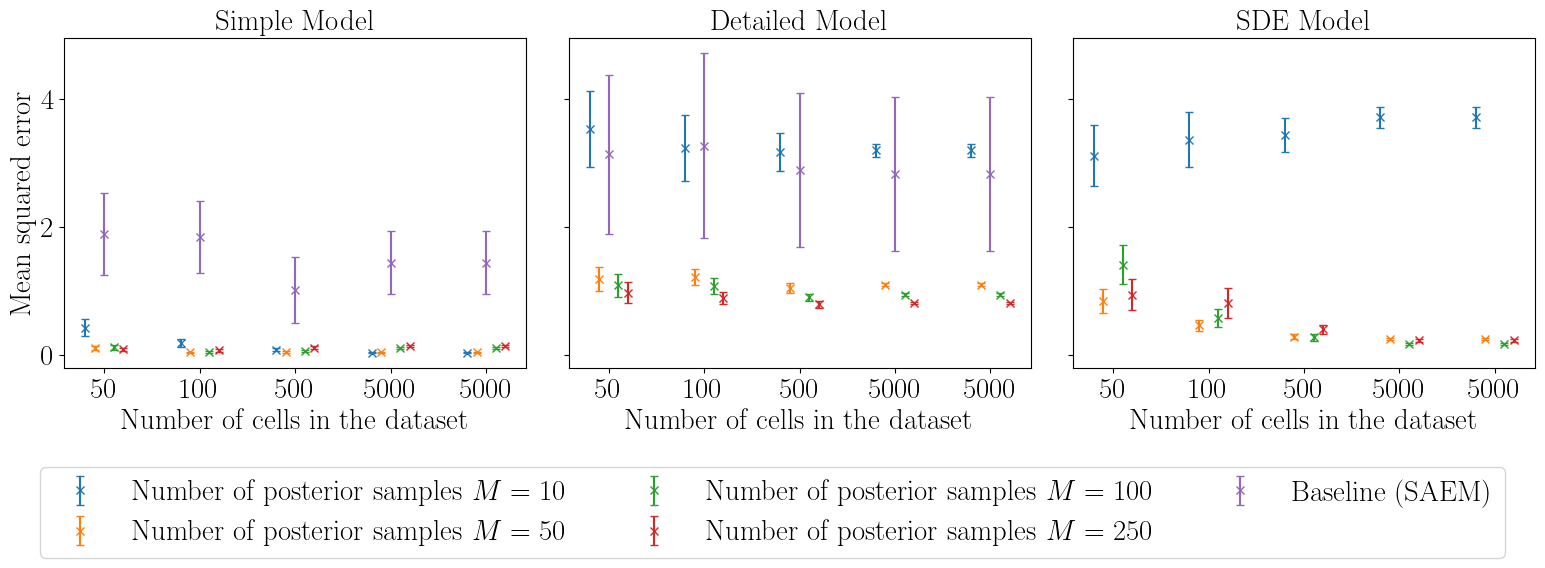

In [29]:
figure, axis = plt.subplots(nrows=1, ncols=len(model_names), tight_layout=True,
                            sharex='col', sharey='row', figsize=(16, 5))

x_shifts = [-0.2, -0.1, 0.1, 0.2]
sample_handles = [0] * len(n_samples_opt_list)
titles = ['Simple', 'Detailed', 'SDE']

for m_i, individual_model in enumerate([individual_model_simple, individual_model_detailed, individual_model_sde]):
    for j, n_samples_opt in enumerate(n_samples_opt_list):
        sample_handles[j] = axis[m_i].errorbar(x=np.arange(len(test_n_cells))+x_shifts[j],
                     y=np.median(amortized_error[m_i, :, j], axis=1), 
                     yerr=np.stack([np.minimum(np.sqrt(amortized_var[m_i, :, j]),
                                                        np.median(amortized_error[m_i, :, j], axis=1)), 
                                             np.sqrt(amortized_var[m_i, :, j])]),
                     alpha=1,
                      linestyle='None', marker='x', capsize=3,  label=f'Number of posterior samples $M={n_samples_opt}$')
        
    if m_i != 2:  # no monolix for sde model
        handle_monolix = axis[m_i].errorbar(np.arange(len(test_n_cells)), 
                                            monolix_errors[m_i], 
                                            np.sqrt(monolix_var[m_i]),
                                            label='Baseline (SAEM)',
                                            linestyle='None', marker='x', capsize=3)
    
    axis[m_i].set_xlabel('Number of cells in the dataset')
    axis[m_i].set_xticks(ticks=np.arange(len(test_n_cells)), labels=np.array(test_n_cells))
    axis[m_i].set_title(f'{titles[m_i]} Model')
    
axis[0].set_ylabel('Relative mean squared error' if compute_relative_error else 'Mean squared error')
lgd = figure.legend(handles=[*sample_handles, handle_monolix], loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.2))
#plt.savefig(f'../plots/paper/error_synthetic_parameters_new_{prior_type}.pdf', format='pdf', #bbox_inches='tight', #pad_inches=0.2,
 #          bbox_extra_artists=(lgd,))
#plt.ylim(0, 10)
plt.show()

In [13]:
average_training_times = [6.11, 3.74 + 8.0, 2.16 + 5.12]

In [ ]:
figure, axis = plt.subplots(nrows=1, ncols=len(model_names), tight_layout=True,
                            sharex='col', sharey='row', figsize=(16, 5))

x_shifts = [-0.2, -0.1, 0.1, 0.2]
sample_handles = [0] * len(n_samples_opt_list)
titles = ['Simple', 'Detailed', 'SDE']

for m_i, individual_model in enumerate([individual_model_simple, individual_model_detailed, individual_model_sde]):
    at_handle = axis[m_i].hlines(average_training_times[m_i], xmin=test_n_cells[0], xmax=test_n_cells[-1], 
                         color='lightblue', linestyle='--', label=f'Average training time')
    for j, n_samples_opt in enumerate(n_samples_opt_list):
        sample_handles[j] = axis[m_i].errorbar(test_n_cells, np.median(time_opt[m_i, :, j], axis=-1), np.std(time_opt[m_i, :, j], axis=-1), 
                         label=f'Number of posterior samples $M={n_samples_opt}$',
                         marker='x', capsize=3)

    if m_i != 2:  # no monolix for sde model
        handle_monolix = axis[m_i].errorbar(test_n_cells, timing_monolix_median[m_i], timing_monolix_var[m_i], label='Baseline (SAEM)',
                                            linestyle='--', marker='x', capsize=3)
    
    axis[m_i].set_xscale('log')
    axis[m_i].set_yscale('log')    
    axis[m_i].set_xlabel('Number of cells in the dataset')
    axis[m_i].set_xticks(ticks=test_n_cells, labels=test_n_cells, rotation=60)
    axis[m_i].set_title(f'{titles[m_i]} Model')

axis[0].set_ylabel('Inference time/start (in hours)')
axis[0].set_ylim(axis[0].get_ylim()[0]*0.1, axis[0].get_ylim()[1])
lgd = figure.legend(handles=[*sample_handles, handle_monolix, at_handle], loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.15))
plt.tight_layout()
#plt.savefig('../plots/paper/scaling_synthetic_parameters.pdf', format='pdf', bbox_inches='tight', #pad_inches=0.2,
#           bbox_extra_artists=(lgd,))
plt.show()

In [ ]:
timing_monolix_nan = timing_monolix.copy()
for mi in range(2):
    for i in range(timing_monolix_nan.shape[1]):
        timing_monolix_nan[mi, i] = np.nan_to_num(timing_monolix_nan[mi, i], nan=np.nanmin(timing_monolix[mi, i]))

In [ ]:
# overall training and inference time for monolix and amortized using 100 samples for all models and data sets
timing_monolix_nan.sum(), time_opt[:, :, 2].sum(), timing_monolix_nan.sum() / time_opt[:, :, 2].sum(), timing_monolix_nan.sum() / (time_opt[:, :, 2].sum() + average_training_times[2])

In [ ]:
m_i = 2
ds = 4
np.median(amortized_error[m_i, ds, :], axis=-1)[0] / np.median(amortized_error[m_i, ds, :], axis=-1)[-1]

# Parameter Estimates and Likelihoods

In [ ]:
def plot_parameter_estimates(result_list: list[np.ndarray],
                             prior_mean: np.ndarray = None,
                             prior_std: np.ndarray = None,
                             true_parameters: np.ndarray = None,
                             run_names: list[str] = None,  # None, if multi-starts are compared
                             color: str = 'blue',
                             ax = None) -> None:
    # plot parameters
    if ax is None:
        fig, ax = plt.subplots(figsize=(15, 5))  # , dpi=600)
    parameters_ind = list(range(1, result_list[0].shape[0] + 1))[::-1]

    if prior_mean is not None and prior_std is not None:
        n_pop_params = len(prior_mean)
        prior_interval = np.array([prior_mean - 1.96 * prior_std, prior_mean + 1.96 * prior_std]).T
        ax.fill_betweenx(parameters_ind[:n_pop_params], prior_interval[:, 0], prior_interval[:, 1],
                         color='grey', alpha=0.2, label='95% prior region')

    for j_x, x in reversed(list(enumerate(result_list))):
        if run_names is None:
            if j_x == 0:
                tmp_legend = 'optimal run'
            else:
                tmp_legend = None
        else:
            tmp_legend = run_names[j_x]
        ax.plot(
            x,
            parameters_ind,
            linestyle='dashed',
            color=color,
            marker='o',
            markersize=3, 
            label=tmp_legend,
            alpha=0.1,
        )

    if true_parameters is not None:
        ax.plot(true_parameters, parameters_ind, color='red', marker='x',
                label='true parameters sample')

    return ax

In [ ]:
# plot parameter estimates
fig, ax = plt.subplots(nrows=len(test_n_cells), ncols=len(n_samples_opt_list)+1, tight_layout=True,
                            sharex='all', sharey='all', figsize=(16, 16))

for j in range(len(test_n_cells)):
    true_pop_parameters_simple = individual_model_simple.load_synthetic_parameter(n_data=test_n_cells[j])
    # set very small variances to 0.001
    true_pop_parameters_simple[individual_model_simple.n_params:][true_pop_parameters_simple[individual_model_simple.n_params:] < 0.001] = 0.001

    for i in range(len(n_samples_opt_list)):
        ax[j, i] = plot_parameter_estimates(amortized_params[0, j, i, :, :individual_model_simple.n_params*2-1],
                                     prior_mean=individual_model_simple.prior_mean,
                                     prior_std=individual_model_simple.prior_std,
                                     true_parameters=true_pop_parameters_simple[:-1],
                                            color='blue',
                                 ax=ax[j, i]
        )
        ax[j, i].set_title(f'$N={test_n_cells[j]}$, $M={n_samples_opt_list[i]}$')
        ax[-1, i].set_xlabel(f'parameter value')
        ax[-1, i].set_xticks(np.arange(-10, 11, 4))
    ax[-1, -1].set_xlabel(f'parameter value')
    ax[-1, -1].set_xticks(np.arange(-10, 11, 4))
        
    ax[j, -1] = plot_parameter_estimates(monolix_params[0, j, :, :individual_model_simple.n_params*2-1],
                                     prior_mean=individual_model_simple.prior_mean,
                                     prior_std=individual_model_simple.prior_std,
                                     true_parameters=true_pop_parameters_simple[:-1],
                                         color='lightgreen',
                                 ax=ax[j, -1]
        )
    ax[j, -1].set_title(f'$N={test_n_cells[j]}$, SAEM')    
    ax[j, 0].set_yticks(list(range(1, individual_model_simple.n_params*2))[::-1], 
                     [name for name in individual_model_simple.param_names] + ['var-' + name for name in individual_model_simple.param_names[:-1]])
    
true_p_handle, = plt.plot([], [], color='red', marker='x', label='true parameters sample')
esimates_handle, = plt.plot([], [], linestyle='dashed', color='blue', marker='o', label='estimated parameters (amortized)')
esimates_handle2, = plt.plot([], [], linestyle='dashed', color='green', marker='o', label='estimated parameters (SAEM)')
lgd = fig.legend(handles=[true_p_handle, esimates_handle, esimates_handle2], loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.02))

#plt.savefig('../plots/paper/synthetic_param_estimates.pdf', format='pdf', bbox_inches='tight', #pad_inches=0.2,
#           bbox_extra_artists=(lgd,))
plt.show()

In [ ]:
# plot parameter estimates
fig, ax = plt.subplots(nrows=len(test_n_cells), ncols=len(n_samples_opt_list)+1, tight_layout=True,
                            sharex='all', sharey='all', figsize=(16, 24))

for j in range(len(test_n_cells)):
    true_pop_parameters_detailed = individual_model_detailed.load_synthetic_parameter(n_data=test_n_cells[j])
    # set very small variances to 0.001
    true_pop_parameters_detailed[individual_model_detailed.n_params:][true_pop_parameters_detailed[individual_model_detailed.n_params:] < 0.001] = 0.001

    for i in range(len(n_samples_opt_list)):
        ax[j, i] = plot_parameter_estimates(amortized_params[1, j, i, :, :individual_model_detailed.n_params*2-1],
                                     prior_mean=individual_model_detailed.prior_mean,
                                     prior_std=individual_model_detailed.prior_std,
                                     true_parameters=true_pop_parameters_detailed[:-1],
                                            color='blue',
                                 ax=ax[j, i]
        )
        ax[j, i].set_title(f'$N={test_n_cells[j]}$, $M={n_samples_opt_list[i]}$')
        ax[-1, i].set_xlabel(f'parameter value')
        ax[-1, i].set_xticks(np.arange(-10, 16, 5))
    ax[-1, -1].set_xlabel(f'parameter value')
    ax[-1, -1].set_xticks(np.arange(-10, 16, 5))
        
    ax[j, -1] = plot_parameter_estimates(monolix_params[1, j, :, :individual_model_detailed.n_params*2-1],
                                     prior_mean=individual_model_detailed.prior_mean,
                                     prior_std=individual_model_detailed.prior_std,
                                     true_parameters=true_pop_parameters_detailed[:-1],
                                         color='lightgreen',
                                 ax=ax[j, -1]
        )
    ax[j, -1].set_title(f'$N={test_n_cells[j]}$, SAEM')
    
    ax[j, 0].set_yticks(list(range(1, individual_model_detailed.n_params*2))[::-1], 
                     [name for name in individual_model_detailed.param_names] + ['var-' + name for name in individual_model_detailed.param_names[:-1]])
    
true_p_handle, = plt.plot([], [], color='red', marker='x', label='true parameters sample')
esimates_handle, = plt.plot([], [], linestyle='dashed', color='blue', marker='o', label='estimated parameters (amortized)')
esimates_handle2, = plt.plot([], [], linestyle='dashed', color='green', marker='o', label='estimated parameters (SAEM)')
lgd = fig.legend(handles=[true_p_handle, esimates_handle, esimates_handle2], loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.02))

#plt.savefig('../plots/paper/synthetic_param_estimates_detailed.pdf', format='pdf', bbox_inches='tight',
#           bbox_extra_artists=(lgd,))
plt.show()

In [ ]:
# plot parameter estimates
fig, ax = plt.subplots(nrows=len(test_n_cells), ncols=len(n_samples_opt_list), tight_layout=True,
                            sharex='all', sharey='all', figsize=(16, 20))

for j in range(len(test_n_cells)):
    true_pop_parameters_sde = individual_model_sde.load_synthetic_parameter(n_data=test_n_cells[j])
    # set very small variances to 0.001
    true_pop_parameters_sde[individual_model_sde.n_params:][true_pop_parameters_sde[individual_model_sde.n_params:] < 0.001] = 0.001

    for i in range(len(n_samples_opt_list)):
        ax[j, i] = plot_parameter_estimates(amortized_params[2, j, i, :, :individual_model_sde.n_params*2-1],
                                     prior_mean=individual_model_sde.prior_mean,
                                     prior_std=individual_model_sde.prior_std,
                                     true_parameters=true_pop_parameters_sde[:-1],
                                            color='blue',
                                 ax=ax[j, i]
        )
        ax[j, i].set_title(f'$N={test_n_cells[j]}$, $M={n_samples_opt_list[i]}$')
        ax[-1, i].set_xlabel(f'parameter value')
        ax[-1, i].set_xticks(np.arange(-10, 11, 4))
    ax[-1, -1].set_xlabel(f'parameter value')
    ax[-1, -1].set_xticks(np.arange(-10, 11, 4))
    
    ax[j, 0].set_yticks(list(range(1, individual_model_sde.n_params*2))[::-1], 
                     [name for name in individual_model_sde.param_names] + ['var-' + name for name in individual_model_sde.param_names[:-1]])
    
true_p_handle, = plt.plot([], [], color='red', marker='x', label='true parameters sample')
esimates_handle, = plt.plot([], [], linestyle='dashed', color='blue', marker='o', label='estimated parameters (amortized)')
lgd = fig.legend(handles=[true_p_handle, esimates_handle], loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.02))

#plt.savefig('../plots/paper/synthetic_param_estimates_sde.pdf', format='pdf', bbox_inches='tight', #pad_inches=0.2,
#           bbox_extra_artists=(lgd,))
plt.show()

In [ ]:
# waterfall plots
# amortized_likelihood = np.ones((3, len(test_n_cells), len(n_samples_opt_list), n_runs)) * np.nan
fig, ax = plt.subplots(nrows=2, ncols=len(n_samples_opt_list)+1, tight_layout=True, sharex='all', figsize=(16, 5))

for j in range(len(test_n_cells)):
    true_pop_parameters_simple = individual_model_simple.load_synthetic_parameter(n_data=test_n_cells[j])
    # set very small variances to 0.001
    true_pop_parameters_simple[individual_model_simple.n_params:][true_pop_parameters_simple[individual_model_simple.n_params:] < 0.001] = 0.001

    labels = [0] * len(n_samples_opt_list)
    for i in range(len(n_samples_opt_list)):
        labels[i], = ax[0, j].plot(amortized_likelihood[0, j, i, :,]-np.min(amortized_likelihood[0, j, i, :,]), 
                                   linestyle='dashed', marker='o', markersize=3, 
                                   label=f'$M={n_samples_opt_list[i]}$ samples')
        ax[0, j].set_title(f'$N={test_n_cells[j]}$')
        ax[-1, j].set_xlabel(f'sorted run')
        ax[-1, j].set_xticks(np.arange(0,101, 25))
    ax[0, j].set_ylim(0, 300)
    m_handle, = ax[1, j].plot(monolix_likelihoods[0, j]-np.nanmin(monolix_likelihoods[0, j]), 
                              linestyle='dashed', marker='o', markersize=3, label='SAEM', color='lightgreen')
    
ax[0, 0].set_ylabel(f'Amortized \nLikelihood')
ax[1, 0].set_ylabel(f'SAEM \nLikelihood')
    
lgd = fig.legend(handles=[*labels, m_handle], loc='lower center', ncol=5, bbox_to_anchor=(0.5, -0.1))

#plt.savefig('../plots/paper/synthetic_param_waterfall.pdf', format='pdf', bbox_inches='tight', #pad_inches=0.2,
#           bbox_extra_artists=(lgd,))
plt.show()

In [ ]:
# waterfall plots
fig, ax = plt.subplots(nrows=2, ncols=len(n_samples_opt_list)+1, tight_layout=True, sharex='all', figsize=(16, 5))

for j in range(len(test_n_cells)):
    true_pop_parameters_simple = individual_model_detailed.load_synthetic_parameter(n_data=test_n_cells[j])
    # set very small variances to 0.001
    true_pop_parameters_simple[individual_model_detailed.n_params:][true_pop_parameters_simple[individual_model_detailed.n_params:] < 0.001] = 0.001

    labels = [0] * len(n_samples_opt_list)
    for i in range(len(n_samples_opt_list)):
        labels[i], = ax[0, j].plot(amortized_likelihood[1, j, i, :,]-np.min(amortized_likelihood[1, j, i, :,]),
                                   linestyle='dashed', marker='o', markersize=3, 
                                   label=f'$M={n_samples_opt_list[i]}$ samples')
        ax[0, j].set_title(f'$N={test_n_cells[j]}$')
        ax[-1, j].set_xlabel(f'sorted run')
        ax[-1, j].set_xticks(np.arange(0,101, 25))
    ax[0, j].set_ylim(0, 300)
    m_handle, = ax[1, j].plot(monolix_likelihoods[1, j]-np.nanmin(monolix_likelihoods[1, j]), 
                              linestyle='dashed', marker='o', markersize=3, label='SAEM', color='lightgreen')
    
ax[0, 0].set_ylabel(f'Amortized\nLikelihood')
ax[1, 0].set_ylabel(f'SAEM\nLikelihood')
    
lgd = fig.legend(handles=[*labels, m_handle], loc='lower center', ncol=5, bbox_to_anchor=(0.5, -0.1))

#plt.savefig('../plots/paper/synthetic_param_waterfall_detailed.pdf', format='pdf', bbox_inches='tight', #pad_inches=0.2,
#           bbox_extra_artists=(lgd,))
plt.show()

In [ ]:
# waterfall plots
fig, ax = plt.subplots(nrows=1, ncols=len(n_samples_opt_list)+1, tight_layout=True, sharex='all', sharey='all', figsize=(16, 3))

for j in range(len(test_n_cells)):
    true_pop_parameters_simple = individual_model_sde.load_synthetic_parameter(n_data=test_n_cells[j])
    # set very small variances to 0.001
    true_pop_parameters_simple[individual_model_sde.n_params:][true_pop_parameters_simple[individual_model_sde.n_params:] < 0.001] = 0.001

    labels = [0] * len(n_samples_opt_list)
    for i in range(len(n_samples_opt_list)):
        labels[i], = ax[j].plot(amortized_likelihood[2, j, i, :,]-np.min(amortized_likelihood[2, j, i, :,]), 
                                   linestyle='dashed', marker='o', markersize=3, 
                                   label=f'$M={n_samples_opt_list[i]}$ samples')
        ax[j].set_title(f'$N={test_n_cells[j]}$')
        ax[j].set_xlabel(f'sorted run')
        ax[j].set_xticks(np.arange(0,101, 25))
        ax[j].set_ylim(0, 300)
    
ax[0].set_ylabel(f'Amortized\nLikelihood')
    
lgd = fig.legend(handles=[*labels], loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.1))

#plt.savefig('../plots/paper/synthetic_param_waterfall_sde.pdf', format='pdf', bbox_inches='tight', #pad_inches=0.2,
#           bbox_extra_artists=(lgd,))
plt.show()